# Spotipy Features Dataframe

In [ ]:
pip install spotipy

In [18]:
import spotipy
import json
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="30da7dcb7eeb4f038924583a5dc6dfb3",
                                                           client_secret="d4d0d4cc03c3457bb24ec6dd80b17441"))


In [19]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import getpass
client_id = getpass.getpass(prompt='client_id: ', stream=None)
client_secret = getpass.getpass(prompt='client_secret: ', stream=None)

client_id: ········
client_secret: ········


In [20]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

## Create a loop to search all pages of the playlist results and add track info to a dictionary

In [84]:
def get_songs_artist(user, playlist_id):
    songs_artist = {}
    results = sp.user_playlist_tracks(user, playlist_id)
    for item in results['items']:
        song_name = item['track']['name']
        artist = item['track']['artists'][0]['name']
        song_id = item['track']['uri'].split(':')[-1]
        songs_artist[song_id] = {'song_name':song_name, 'artist':artist}
    while results['next']:
        results = sp.next(results)
        for item in results['items']:
            song_name = item['track']['name']
            artist = item['track']['artists'][0]['name']
            song_id = item['track']['uri'].split(':')[-1]
            songs_artist[song_id] = {'song_name':song_name, 'artist':artist}
    return songs_artist

In [85]:
songs = get_songs_artist("spotify", "4rnleEAOdmFAbRcNCgZMpY")

## Convert to DataFrame

In [7]:
data=pd.DataFrame(songs).T.reset_index()

In [8]:
data.head()

,index,song_name,artist
0,7dS5EaCoMnN7DzlpT6aRn2,Take Me To Church,Hozier
1,2V4bv1fNWfTcyRJKmej6Sj,Cooler Than Me - Single Mix,Mike Posner
2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"Tyler, The Creator"
3,3gbBpTdY8lnQwqxNCcf795,Pompeii,Bastille
4,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean),Shakira


## Using song ids in first column, add column for song features

In [9]:
combo_dataframe=data

In [10]:
combo_dataframe['audio features']=list(map(lambda x: sp.audio_features(x)[0],data['index']))

In [14]:
combo_dataframe.head()

,index,song_name,artist,audio features
0,7dS5EaCoMnN7DzlpT6aRn2,Take Me To Church,Hozier,"{'danceability': 0.566, 'energy': 0.664, 'key'..."
1,2V4bv1fNWfTcyRJKmej6Sj,Cooler Than Me - Single Mix,Mike Posner,"{'danceability': 0.768, 'energy': 0.82, 'key':..."
2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"Tyler, The Creator","{'danceability': 0.558, 'energy': 0.559, 'key'..."
3,3gbBpTdY8lnQwqxNCcf795,Pompeii,Bastille,"{'danceability': 0.679, 'energy': 0.715, 'key'..."
4,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean),Shakira,"{'danceability': 0.778, 'energy': 0.824, 'key'..."


## Create individual columns for the individual audio features 

In [15]:
audio_df=pd.json_normalize(combo_dataframe['audio features'])

In [16]:
audio_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.1790,0.000000,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.405,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4


## Concatenate both DataFrames

In [17]:
print(data.shape,audio_df.shape)

(5290, 4) (5290, 18)


In [18]:
thefinal = pd.concat([data, audio_df], axis=1, join='inner')

In [19]:
thefinal.shape

(5290, 22)

In [20]:
thefinal.head()

,index,song_name,artist,audio features,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,7dS5EaCoMnN7DzlpT6aRn2,Take Me To Church,Hozier,"{'danceability': 0.566, 'energy': 0.664, 'key'...",0.566,0.664,4,-5.303,0,0.0464,...,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,2V4bv1fNWfTcyRJKmej6Sj,Cooler Than Me - Single Mix,Mike Posner,"{'danceability': 0.768, 'energy': 0.82, 'key':...",0.768,0.820,7,-4.630,0,0.0474,...,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"Tyler, The Creator","{'danceability': 0.558, 'energy': 0.559, 'key'...",0.558,0.559,6,-9.222,1,0.0959,...,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,3gbBpTdY8lnQwqxNCcf795,Pompeii,Bastille,"{'danceability': 0.679, 'energy': 0.715, 'key'...",0.679,0.715,9,-6.383,1,0.0407,...,0.271,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean),Shakira,"{'danceability': 0.778, 'energy': 0.824, 'key'...",0.778,0.824,10,-5.892,0,0.0707,...,0.405,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4


In [ ]:
thefinal.to_csv('playlist_csv.csv')

In [21]:
longlist=list(set(thefinal['artist']))

In [ ]:
artistlist_results = [sp.search(q=artist, limit=1700) for artist in longlist]

In [25]:
artisttest = longlist[:3]

In [ ]:
def get_songs_artist(arlist_list):
    artistresults = {}
    results = sp.searchuser_playlist_tracks(user, playlist_id)
    for item in results['items']:
        song_name = item['track']['name']
        artist = item['track']['artists'][0]['name']
        song_id = item['track']['uri'].split(':')[-1]
        artistresults[song_id] = {'song_name':song_name, 'artist':artist}
    while results['next']:
        results = sp.next(results)
        for item in results['items']:
            song_name = item['track']['name']
            artist = item['track']['artists'][0]['name']
            song_id = item['track']['uri'].split(':')[-1]
            artistresults[song_id] = {'song_name':song_name, 'artist':artist}
    return artistresults

In [ ]:
def get_songs_artist(user, playlist_id):
    artist_songs = {}
    sp.search(q=artist, limit=50) for artist in longlist]
    for item in results['items']:
        song_name = item['track']['name']
        artist = item['track']['artists'][0]['name']
        song_id = item['track']['uri'].split(':')[-1]
        songs_artist[song_id] = {'song_name':song_name, 'artist':artist}
    while results['next']:
        results = sp.next(results)
        for item in results['items']:
            song_name = item['track']['name']
            artist = item['track']['artists'][0]['name']
            song_id = item['track']['uri'].split(':')[-1]
            songs_artist[song_id] = {'song_name':song_name, 'artist':artist}
    return songs_artist

In [31]:
def artistfeed(artistlist):
    for i in range(1,len(artistlist),50):
        print('woo')

In [32]:
artistfeed(artisttest)

woo


## 8/11 work

In [ ]:
#augment get_songs_artist function to search multiple pages for each artist in the long artistlist

In [202]:
import pandas as pd
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
music = pd.read_csv('C://Users//Owner//DA//Weekly Projects//skills_practice//APIs//playlist_csv.csv')

In [17]:
music.head(3)

,Unnamed: 0,index,song_name,artist,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,7dS5EaCoMnN7DzlpT6aRn2,Take Me To Church,Hozier,0.566,0.664,4,-5.303,0,0.0464,...,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,1,2V4bv1fNWfTcyRJKmej6Sj,Cooler Than Me - Single Mix,Mike Posner,0.768,0.820,7,-4.630,0,0.0474,...,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"Tyler, The Creator",0.558,0.559,6,-9.222,1,0.0959,...,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4


In [18]:
music.columns

Index(['Unnamed: 0', 'index', 'song_name', 'artist', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [8]:
stats = music.drop(['Unnamed: 0','index','song_name','artist','analysis_url','track_href','uri','id','type'],axis=1)

In [9]:
stats.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [5]:
stats.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.116,0.437,128.945,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.1790,0.000000,0.689,0.625,129.965,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.109,0.620,78.558,180387,4
3,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435,214148,4
4,0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.405,0.758,100.024,218093,4


In [10]:
X_scaled = StandardScaler().fit_transform(stats)

In [25]:
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.718970,-0.206232,-0.344921,0.310893,-1.103222,-0.577331,2.381205,-0.209825,-0.503857,-0.346600,0.254782,0.663107,0.086705
1,0.767039,0.726513,0.480704,0.597829,-1.103222,-0.567001,0.120022,-0.209825,3.543302,0.477943,0.293158,0.002246,0.086705
2,-0.777822,-0.834041,0.205496,-1.359986,0.906436,-0.065976,1.074191,-0.209765,-0.553299,0.456014,-1.640935,-0.763604,0.086705
3,0.112312,0.098704,1.031121,-0.149569,0.906436,-0.636214,-0.394335,-0.209825,0.590924,0.241106,0.197972,0.022145,0.086705
4,0.840604,0.750430,1.306329,0.059771,-1.103222,-0.326302,0.641833,-0.209825,1.537380,1.061264,-0.833316,0.113960,0.086705


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

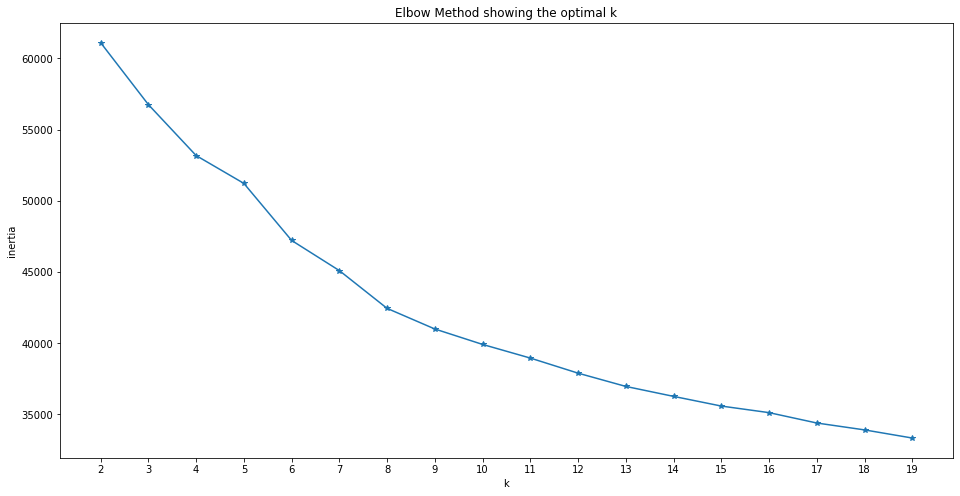

In [36]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, marker = '*')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

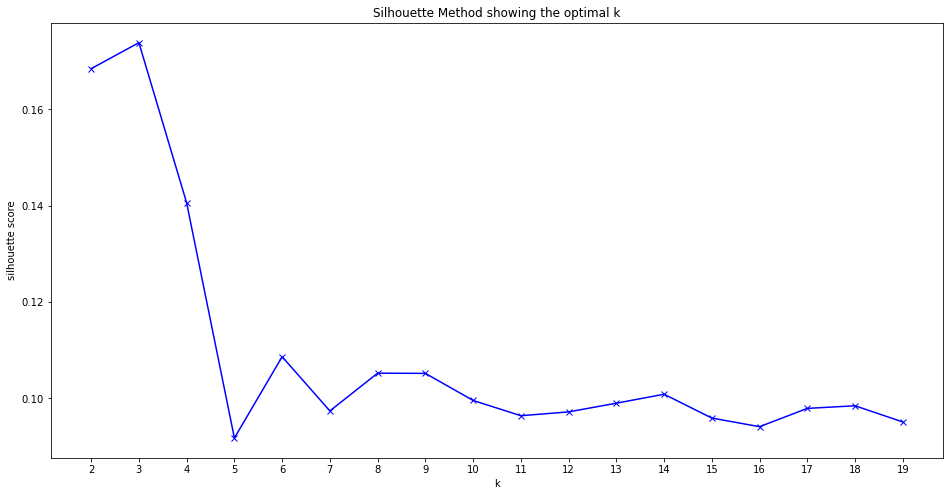

In [27]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [7]:
k=6
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(X_scaled)
clusters=kmeans.predict(X_scaled)

In [188]:
stats['clusters']=clusters
music['clusters']=clusters

In [21]:
stats['clusters'].value_counts(),music['clusters'].value_counts()

(2    1792
 0    1595
 5     646
 1     559
 4     549
 3     149
 Name: clusters, dtype: int64,
 2    1792
 0    1595
 5     646
 1     559
 4     549
 3     149
 Name: clusters, dtype: int64)

In [10]:
c0=stats[stats['clusters']==0]
c0=c0.drop('clusters',axis=1)
c0avg=np.mean(c0)
c0avg

danceability             0.672848
energy                   0.742402
key                      5.934169
loudness                -5.414409
mode                     0.000000
speechiness              0.076028
acousticness             0.101281
instrumentalness         0.004842
liveness                 0.157485
valence                  0.557094
tempo                  121.311048
duration_ms         216366.015674
time_signature           3.994984
dtype: float64

In [11]:
c0=stats[stats['clusters']==0]
c0=c0.drop('clusters',axis=1)
c0avg=np.mean(c0)
c1=stats[stats['clusters']==1]
c1=c1.drop('clusters',axis=1)
c1avg=np.mean(c1)
c2=stats[stats['clusters']==2]
c2=c2.drop('clusters',axis=1)
c2avg=np.mean(c2)
c3=stats[stats['clusters']==3]
c3=c3.drop('clusters',axis=1)
c3avg=np.mean(c3)
c4=stats[stats['clusters']==4]
c4=c4.drop('clusters',axis=1)
c4avg=np.mean(c4)
c5=stats[stats['clusters']==5]
c5=c5.drop('clusters',axis=1)
c5avg=np.mean(c5)

## 8/12-13 work

In [66]:
new_song = input('Enter a song you like:')
songdeets=sp.search(new_song, limit=10, offset=0, type='track', market=None)
song_id=sp.audio_features(songdeets['tracks']['items'][0]['id'])
song_id=song_id[0]
song_id

Enter a song you like:believe


{'danceability': 0.776,
 'energy': 0.78,
 'key': 10,
 'loudness': -4.374,
 'mode': 0,
 'speechiness': 0.128,
 'acousticness': 0.0622,
 'instrumentalness': 0,
 'liveness': 0.081,
 'valence': 0.666,
 'tempo': 124.949,
 'type': 'audio_features',
 'id': '0pqnGHJpmpxLKifKRmU6WP',
 'uri': 'spotify:track:0pqnGHJpmpxLKifKRmU6WP',
 'track_href': 'https://api.spotify.com/v1/tracks/0pqnGHJpmpxLKifKRmU6WP',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0pqnGHJpmpxLKifKRmU6WP',
 'duration_ms': 204347,
 'time_signature': 4}

## Using a user-given input, return a song in my database from the cluster most like the given song

In [230]:
def boss_wants_music(user_input):
    songs_artist = {}
    #run input in spotify search to retrieve json file
    songdeets=sp.search(user_input, limit=10, offset=0, type='track', market=None)
    #search first result of json file  for the song_id/uri and artist name
    song_id=songdeets['tracks']['items'][0]['id']
    new_song_artist=songdeets['tracks']['items'][0]['artists'][0]['name']
    # apply song_id/uri into spotify API to retrieve audio features
    new_song_audio_features=sp.audio_features(song_id)
    songs_artist[song_id] = {'song_name':new_song, 'artist':new_song_artist, 'audio features': new_song_audio_features[0]}
    #create a Dataframe of the new song's features to show only the numerical values the larger
    #song database used in the kmeans clustering
    new_song_df=pd.DataFrame(songs_artist).T.reset_index()
    new_song_audio_features=pd.json_normalize(new_song_df['audio features'])
    numdf=new_song_audio_features.select_dtypes(np.number)
    #apply the premade kmeans definition to determine the closest cluster from the database to the new song
    song_scaled = StandardScaler().fit_transform(numdf)
    clusters=kmeans.predict(song_scaled)[0]
    #filter database by this cluster number and return a random song from this cluster
    song_pool=music[music['clusters']==clusters]       
    song_pool=pd.DataFrame(song_pool).reset_index(drop=True)
    print('Now playing: ', random.choice(song_pool['song_name']))

In [231]:
new_song = input('Enter a song you like:')
#new_song_found = 
boss_wants_music(new_song)

Enter a song you like:threshold
Now playing:  Supalonely


## 8/16 DBScan instead of kmeans

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline

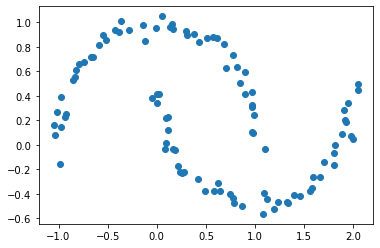

In [2]:
"""moons = make_moons(n_samples=100, shuffle=True, noise=0.05)
plt.scatter(moons[0][:,0], moons[0][:,1])"""

In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5).fit(moons[0])
dbscan.labels_

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

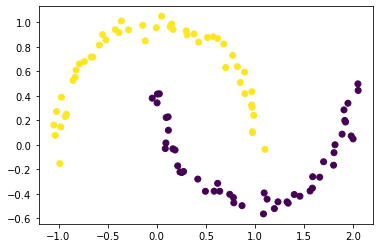

In [4]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=dbscan.labels_)